In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
data= pd.read_csv(r"H:\Data\......\Titanic\train.csv")

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


Removing irrelevant and null data from the train and test datasets.

In [4]:
data= data.drop('Cabin', axis=1)
data= data.drop('Name', axis=1)
data= data.drop('Ticket', axis=1)

In [5]:
data.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Sex              0
Age            177
SibSp            0
Parch            0
Fare             0
Embarked         2
dtype: int64

In [6]:
data= data.dropna()

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 712 entries, 0 to 890
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  712 non-null    int64  
 1   Survived     712 non-null    int64  
 2   Pclass       712 non-null    int64  
 3   Sex          712 non-null    object 
 4   Age          712 non-null    float64
 5   SibSp        712 non-null    int64  
 6   Parch        712 non-null    int64  
 7   Fare         712 non-null    float64
 8   Embarked     712 non-null    object 
dtypes: float64(2), int64(5), object(2)
memory usage: 55.6+ KB


Creating a column for getting somem important insights.

In [8]:
data['Adult_male']= ((data['Sex'] == 'male') & (data['Age'] >= 18)).astype(int)

In [9]:
data['Adult_male'].value_counts()

1    395
0    317
Name: Adult_male, dtype: int64

In [10]:
data.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Adult_male
0,1,0,3,male,22.0,1,0,7.2500,S,1
1,2,1,1,female,38.0,1,0,71.2833,C,0
2,3,1,3,female,26.0,0,0,7.9250,S,0
3,4,1,1,female,35.0,1,0,53.1000,S,0
4,5,0,3,male,35.0,0,0,8.0500,S,1


In [11]:
data['Embarked'].value_counts()

S    554
C    130
Q     28
Name: Embarked, dtype: int64

In [12]:
data['Embarked']= data['Embarked'].replace({'S': 'Southampton', 'C': 'Cherbourg', 'Q': 'Queenstown'})

In [13]:
data.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Adult_male
0,1,0,3,male,22.0,1,0,7.2500,Southampton,1
1,2,1,1,female,38.0,1,0,71.2833,Cherbourg,0
2,3,1,3,female,26.0,0,0,7.9250,Southampton,0
3,4,1,1,female,35.0,1,0,53.1000,Southampton,0
4,5,0,3,male,35.0,0,0,8.0500,Southampton,1


By observing Histogram for the distribution of Age I observed that the majority of the passengers falls in the range of age 18 to 35.

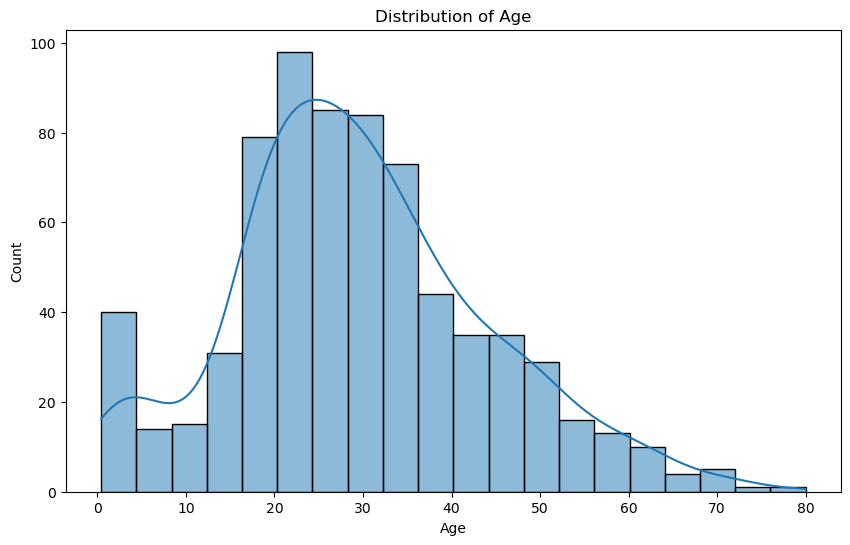

In [14]:
plt.figure(figsize=(10,6))
sns.histplot(data['Age'], kde= True)
plt.title('Distribution of Age')
plt.show()

As expected a lot of passengers had bought the ticket which was low in fare.

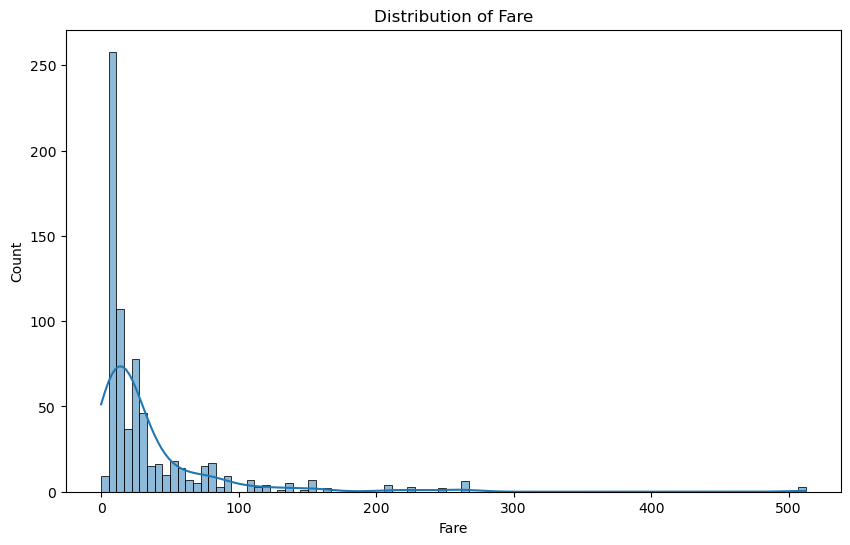

In [15]:
plt.figure(figsize=(10, 6))
sns.histplot(data['Fare'], kde=True)
plt.title('Distribution of Fare')
plt.show()

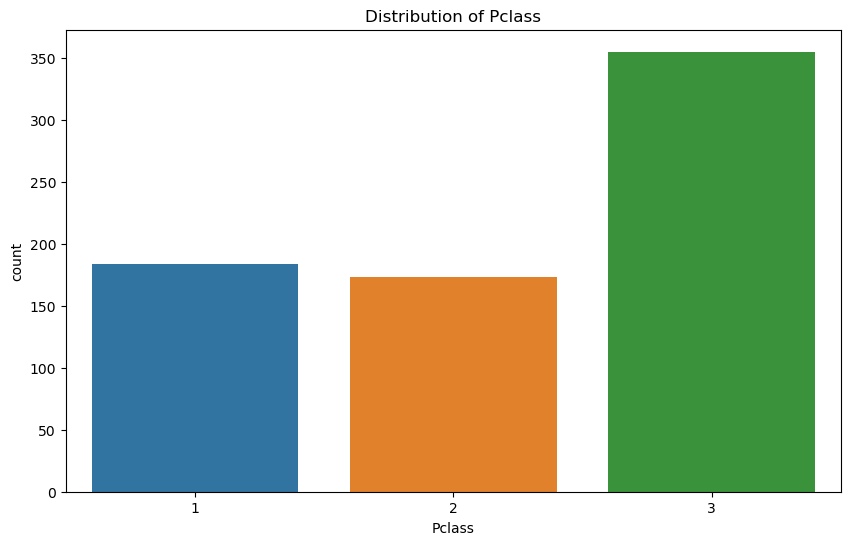

In [16]:
plt.figure(figsize=(10,6))
sns.countplot(data= data, x= 'Pclass')
plt.title('Distribution of Pclass')
plt.show()

There were more number of males as compared to the females present on the ship. Male passengers were almost 1.5 times of the females.

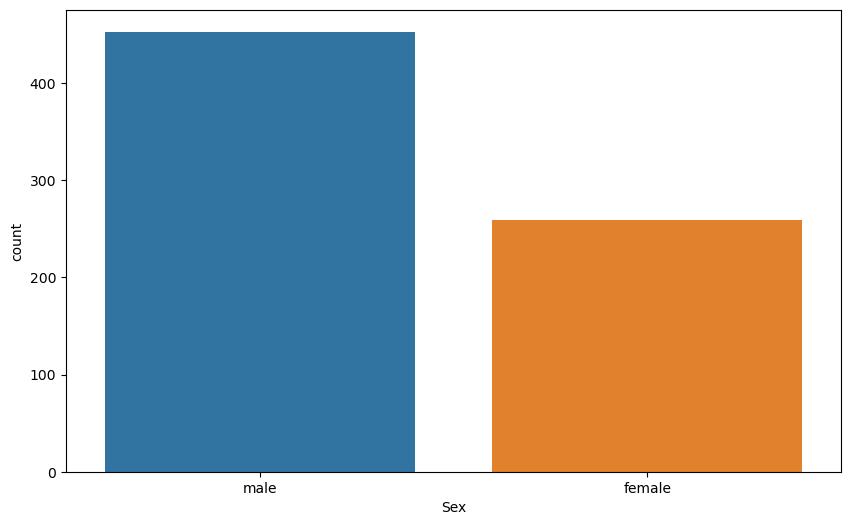

In [17]:
plt.figure(figsize=(10,6))
sns.countplot(data= data, x='Sex')
plt.show()

Most of the passengers that had survived were of the first class and second class.

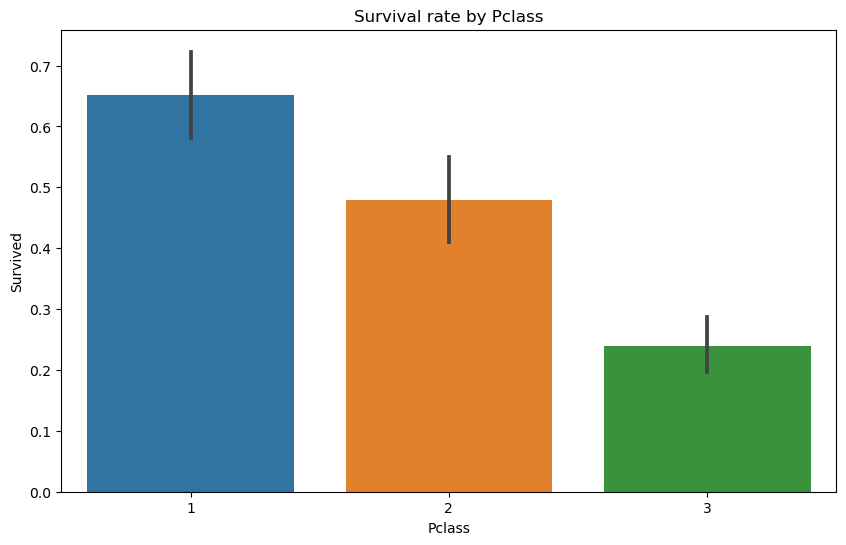

In [18]:
plt.figure(figsize=(10,6))
sns.barplot(data= data, x='Pclass', y='Survived')
plt.title('Survival rate by Pclass')
plt.show()

Most of the females had survived while most of the males had to loose their lives.

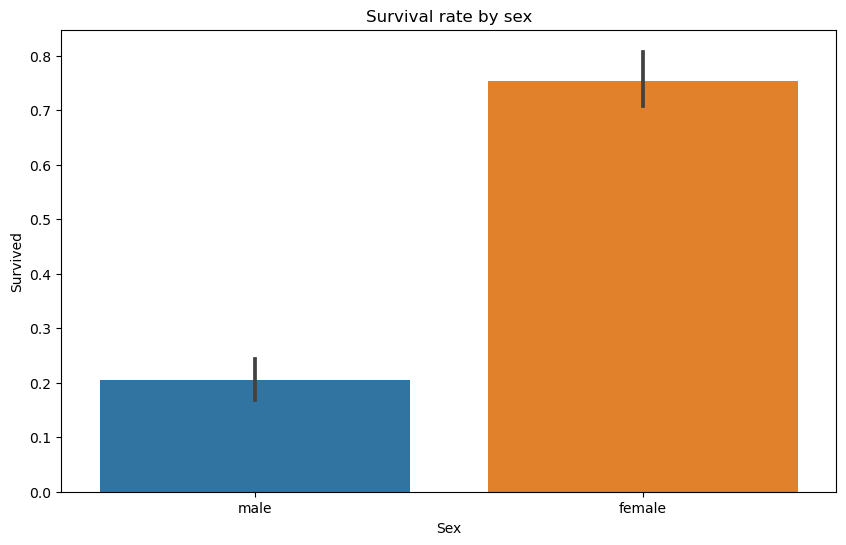

In [20]:
plt.figure(figsize=(10,6))
sns.barplot(data= data, x='Sex', y='Survived')
plt.title('Survival rate by sex')
plt.show()

Females from all the classes had a better survival rate as compared to the males of all the classes. Out of all the classes in males passengers of the first class had a better survival rate.

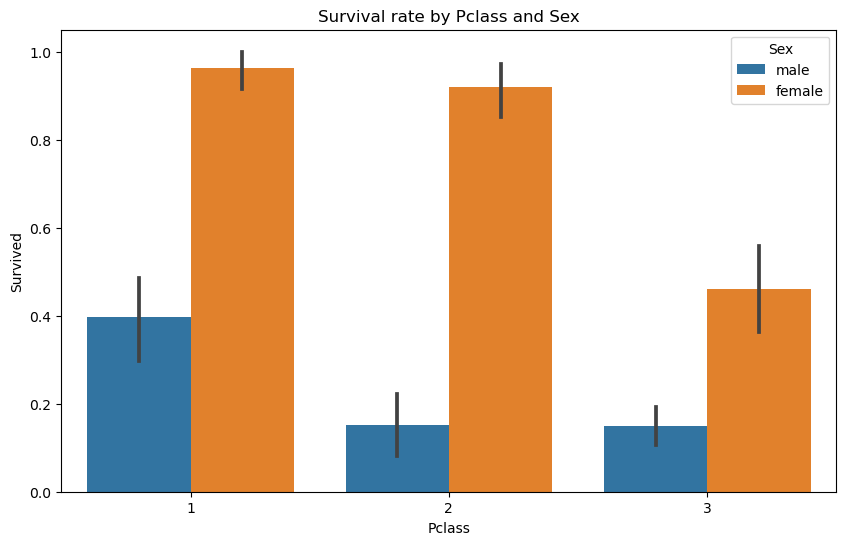

In [21]:
plt.figure(figsize=(10,6))
sns.barplot(data=data, x='Pclass', y='Survived', hue='Sex')
plt.title('Survival rate by Pclass and Sex')
plt.show()

In [22]:
age_bins= [0, 12, 18, 35, 60, 80]
age_labels= ['Child', 'Teen', 'Adult', 'Mid_Age', 'Senior']
data['Age_Group']= pd.cut(data['Age'], bins= age_bins, labels= age_labels, right= False) 

In [23]:
data[['Age', 'Age_Group']].head()

,Age,Age_Group
0,22.0,Adult
1,38.0,Mid_Age
2,26.0,Adult
3,35.0,Mid_Age
4,35.0,Mid_Age


Passenger of first and second class had a better chances of survival as compared to the passengers of the third class irrespective of their age group. 

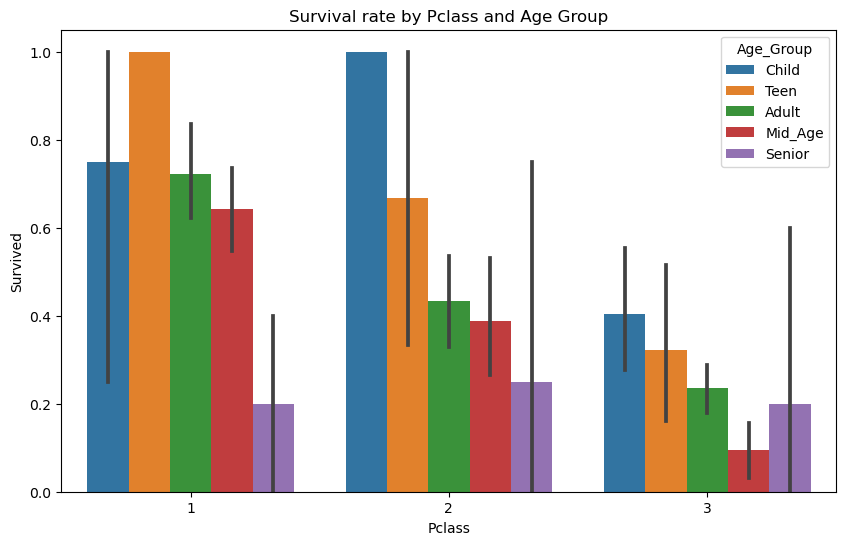

In [24]:
plt.figure(figsize=(10,6))
sns.barplot(data=data, x='Pclass', y='Survived', hue='Age_Group')
plt.title('Survival rate by Pclass and Age Group')
plt.show()

1. All the passengers of child age group of first class and second class survived.
2. Almost half of the total female child of class 3 survived, whereas only 1/4th of the total male child of class 3 survived.
3. Almost all of teen male could not survive, irrespective of the passenger class.
4. Other than some casualities of third class female teen passengers, all of the female teen of first class, second class and third class survived.
5. Heavy loss of life had been observed in the adult male age group of the third class passengers.
6. Almost all passengers of the first class and second class of adult female survived.
7. No survivors were observed in the senior male age group, irrespective of the passenger class.
8. No casualities had been observed in the senior female age group.

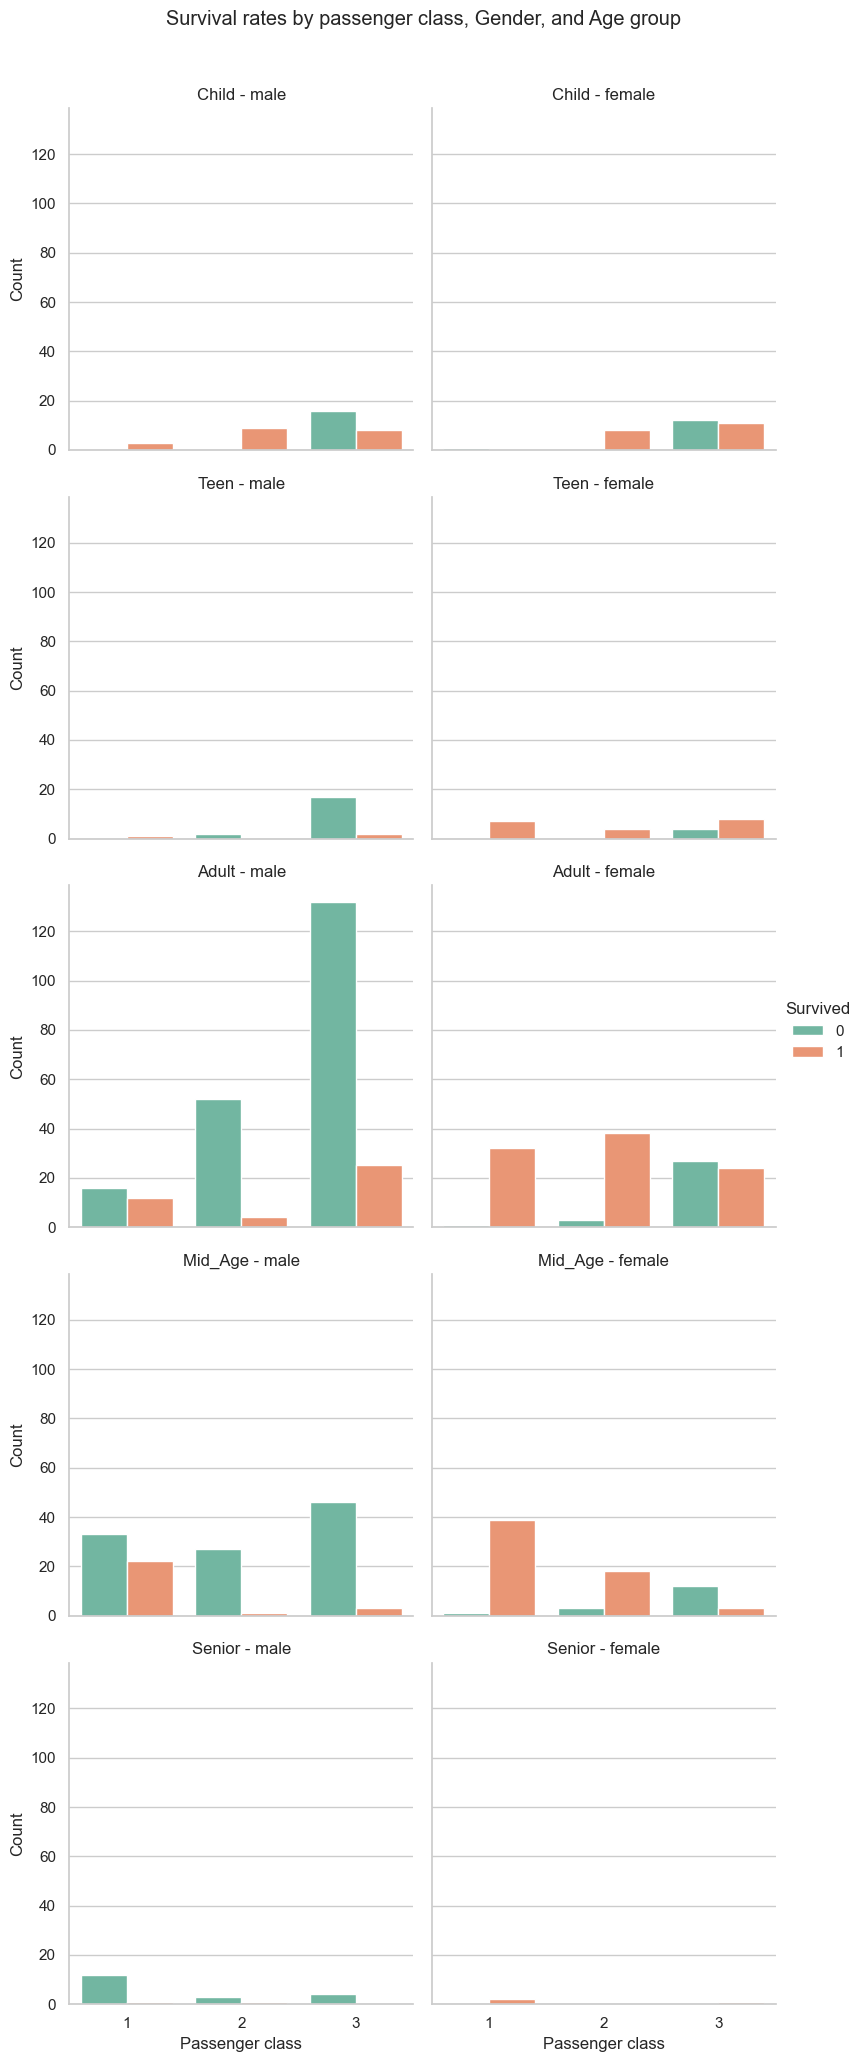

In [25]:
sns.set(style= 'whitegrid')
g= sns.catplot(data= data, x='Pclass', hue='Survived', col= 'Sex', row= 'Age_Group', kind='count', height= 4, aspect=1, palette= 'Set2')
g.set_axis_labels("Passenger class", "Count")
g.set_titles("{row_name} - {col_name}")
g.fig.suptitle("Survival rates by passenger class, Gender, and Age group", y=1.03)
plt.show()

In [26]:
from sklearn.preprocessing import LabelEncoder

In [27]:
le= LabelEncoder()

In [28]:
data['Sex']= le.fit_transform(data['Sex'])

In [29]:
data['Embarked']= le.fit_transform(data['Embarked'])

In [30]:
data.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Adult_male,Age_Group
0,1,0,3,1,22.0,1,0,7.2500,2,1,Adult
1,2,1,1,0,38.0,1,0,71.2833,0,0,Mid_Age
2,3,1,3,0,26.0,0,0,7.9250,2,0,Adult
3,4,1,1,0,35.0,1,0,53.1000,2,0,Mid_Age
4,5,0,3,1,35.0,0,0,8.0500,2,1,Mid_Age


From the above correlation plot we can observe:
1. There is a moderate negative(-0.52) correlation between adult male and survived. This suggests that as the likelihood of being an adult male increases the likelihood of survival decreases.
2. Sex column has a moderate negative correlation with survived column. Suggests that as the likelihood of being male increases the likelihood of survival decreases. 

<function matplotlib.pyplot.show(close=None, block=None)>

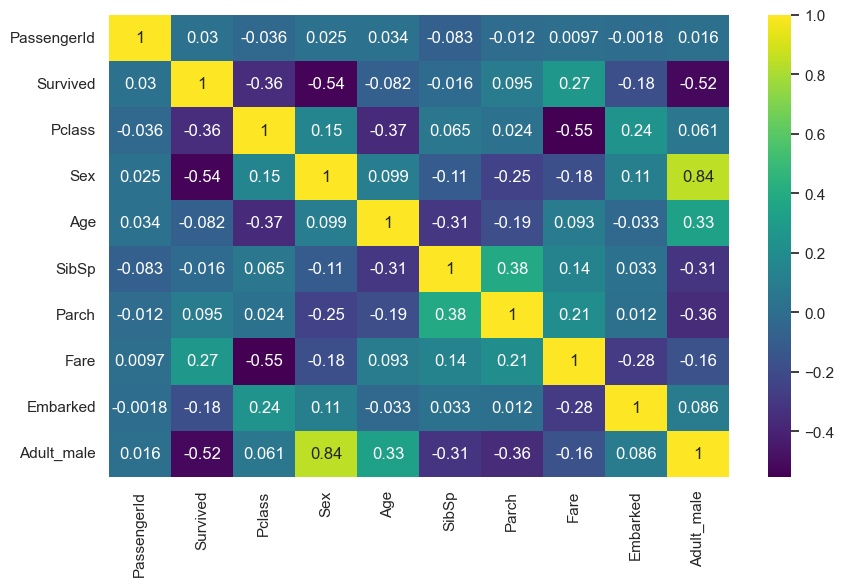

In [31]:
plt.figure(figsize=(10,6))
sns.heatmap(data=data.corr(), annot= True, cmap='viridis')
plt.show